### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [85]:
data = pd.read_csv('data/coupons.csv')

In [86]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

## Step 1: Analyze the data
1. Running the 'df.info()' will indicate if there are any null values
2. Look at what type of data is in various columns to ensure that there are no "invalid" values. This is done using the value_counts() on few of the columns.
3. Map the columns

#### gender    -  Gender: male, female
#### age    -  Age: below 21, 21 to 25, 26 to 30, etc.
#### maritalStatus    -  Marital Status: single, married partner, unmarried partner, or widowed
#### has_children    -  Number of children: 0, 1, or more than 1
#### education    -  Education: high school, bachelors degree, associates degree, or graduate degree
#### occupation   -  Occupation: architecture & engineering, business & financial, etc.
#### income    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
#### Bar    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
#### CarryAway    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
#### CoffeeHouse    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
#### RestaurantLessThan20    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per 
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
#### Restaurant20To50    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
#### coupon What is the coupon that was delivered
#### destination - Driving destination: home, work, or no urgent destination 
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
#### weather    - Weather: sunny, rainy, or snowy
#### temperature - Temperature: 30F, 55F, or 80F
#### time    - Time: 10AM, 2PM, or 6PM
#### passanger    - Passenger: alone, partner, kid(s), or friend(s)
#### Y -  Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.
#### direction_same	- Place is in same direction as the passenger is travelling
#### direction_opp - Place is in the opp direction as the passenger is travelling
#### toCoupon_GEQ5min - Place offering the coupon is >= 5 min
#### toCoupon_GEQ15min - Place offering the coupon is >= 15 min
#### toCoupon_GEQ25min - Place offering the coupon is >= 25 min
#### expiration	    - time before it expires: 2 hours or one day


Unmapped
car

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [88]:
data["destination"].value_counts()

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

In [89]:
data["car"].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [90]:
data["RestaurantLessThan20"].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [91]:
data["Restaurant20To50"].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

In [92]:
data["CoffeeHouse"].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [93]:
data["Bar"].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [94]:
data["CarryAway"].value_counts()

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [95]:
data["coupon"].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [96]:
data["age"].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [53]:
data["occupation"].value_counts()

occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

In [97]:
data["passanger"].value_counts()

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

In [98]:
data["maritalStatus"].value_counts()

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64

In [99]:
data["income"].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [100]:
data["temperature"].value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

## Step 2: Correcting and Manipulating the data
- Fill the null fields with "never"
- Fill the "less1" with "never"
- Replace age column values "50plus" with "51" and "below21" with "20"
- Add a new column "distance" which will add the values in toCoupon_GEQ5min, toCoupon_GEQ15min and toCoupon_GEQ25min

In [101]:
data['CarryAway'].fillna('never', inplace=True)
data['Bar'].fillna('never', inplace=True)
data['CoffeeHouse'].fillna('never', inplace=True)
data['RestaurantLessThan20'].fillna('never', inplace=True)
data['Restaurant20To50'].fillna('never', inplace=True)

In [102]:
data['CarryAway'] = data['CarryAway'].replace('less1','never') 
data['Bar'] = data['Bar'].replace('less1','never') 
data['CoffeeHouse'] = data['CoffeeHouse'].replace('less1','never') 
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].replace('less1','never') 
data['Restaurant20To50'] = data['Restaurant20To50'].replace('less1','never') 

In [103]:
data["age"].value_counts()
data["age"] = data["age"].replace("50plus", "51")
data["age"] = data["age"].replace("below21", "20")
data['age'] = pd.to_numeric(data['age'], errors='coerce')

In [104]:
data['coupon'] = data['coupon'].astype(str)

In [105]:
data["distance"] = data["toCoupon_GEQ5min"]+data["toCoupon_GEQ15min"]+data["toCoupon_GEQ25min"]

4. What proportion of the total observations chose to accept the coupon? 



#### <span style='color:red'>Answer: 56.8% of the observations chose to accept the coupon</span>

In [106]:
# Group the data by the Y column which indicates if the coupon was accepted or rejected,get the size of each of the Y options and reset the index
data_proportion_accept= (data.groupby('Y').size().reset_index())
# Create a Proportion column which will contain the proportion of each of the Y options
data_proportion_accept["Proportion"] = data_proportion_accept.iloc[:, 1] /len(data)
data_proportion_accept["Y"] = data_proportion_accept["Y"].astype(str)
#Draw a pie chart
fig = px.pie(data_proportion_accept, values='Proportion',names='Y', title='Coupon Accept/Reject Distribution')
fig.update_traces(labels=['Rejected Coupons', 'Accepted Coupons'])
fig.show()



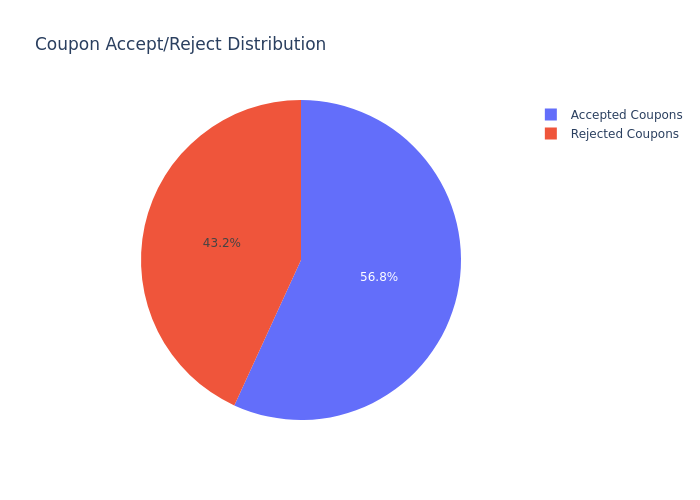

5. Use a bar plot to visualize the `coupon` column.

In [107]:
#Group the data by "coupon", get the size and reset the index
data_coupon= (data.groupby('coupon').size().reset_index())
#Draw the bar chart
fig = px.bar(data_coupon, x='coupon', y=data_coupon.iloc[:, 1], color='coupon', title='Coupon category distribution', 
             labels = {"coupon":"Coupon Category", "y":"Count of Coupon"}, text_auto=True)
fig.show()

#Add column Proportion of each category
data_coupon["Proportion"] = data_coupon.iloc[:, 1] /len(data)
fig1 = px.pie(data_coupon, values='Proportion',names='coupon', title='Coupon Category Proportions')
fig1.show()


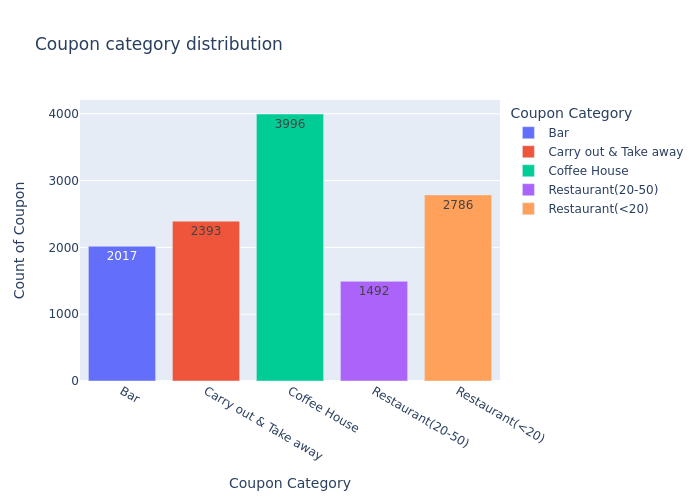

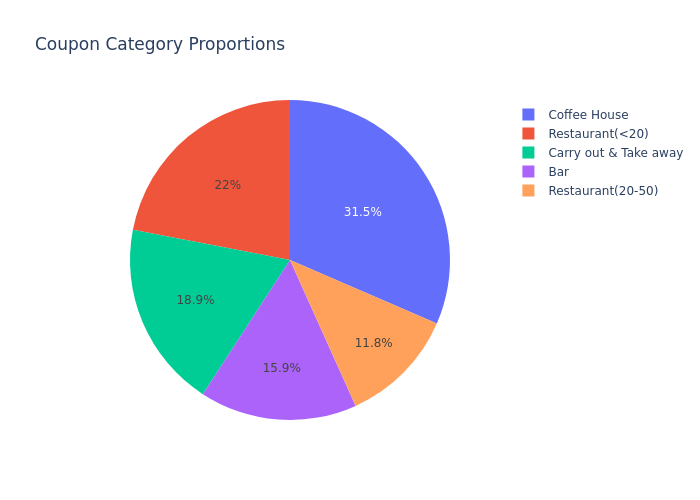

6. Use a histogram to visualize the temperature column.

In [108]:
fig = px.histogram(data, x='temperature', title='Temperature Distribution in the Observations', color='temperature', 
                   labels = {"temperature":"Temperature"}, text_auto=True)
fig.update_yaxes(title_text='Number of observations for the temperature')
fig.show()

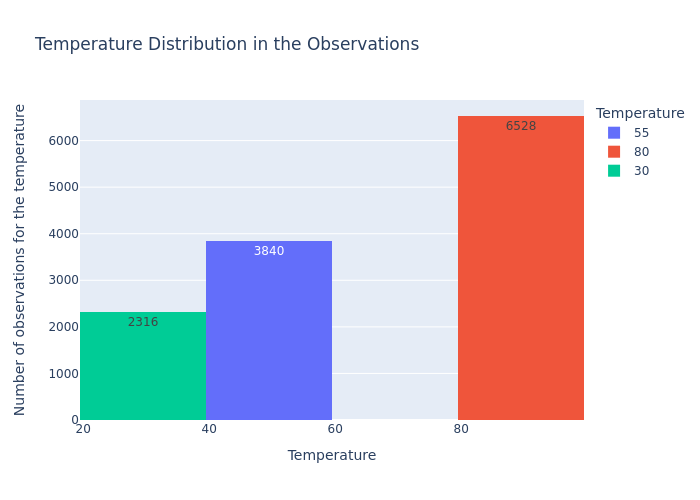

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [109]:
data_bar_coupons = data[data["coupon"] == 'Bar']
data_bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,distance
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,4~8,1~3,1,1,0,0,1,0,2
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,4~8,1~3,1,0,0,1,0,1,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,4~8,1~3,1,1,1,0,1,0,3
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,never,1,0,0,0,1,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,never,1,0,0,1,0,1,1


2. What proportion of bar coupons were accepted?


#### <span style='color:red'>Answer: 41% of bar coupons were accepted</span>

In [110]:
#Group the observations of bar coupons by coupon acceptance column Y, get the size of each option and reset index
data_bar_accept= (data_bar_coupons.groupby('Y').size().reset_index())
#Add Proportion column to represent the proportion of accepted and rejected coupons
data_bar_accept["Proportion"] = data_bar_accept.iloc[:, 1] /len(data_bar_coupons)
data_bar_accept["Y"] = data_bar_accept["Y"].astype(str)

fig = px.pie(data_bar_accept, values='Proportion',names='Y', title='Coupon Acceptance Distribution',
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"])
fig.update_traces(labels=['Rejected Coupons', 'Accepted Coupons'])
fig.show()

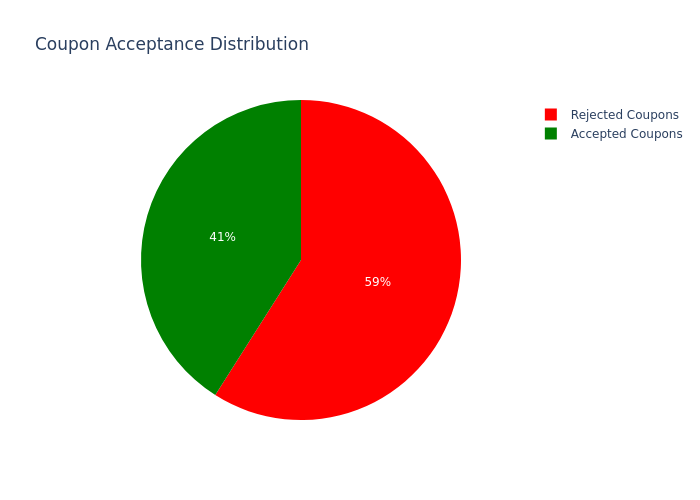

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


#### <span style='color:red'>Answer: Acceptance rate of those who went to a bar 3 or fewer times a month was almost 4 times higher than those who went more</span>

In [111]:
# Create a Dataframe for Accepted bar coupons
data_bar_accept_coupons = data_bar_coupons[data_bar_coupons["Y"]== 1]
#Create a Dataframe for the accepted coupons by ones that went 3 or fewer times to the bar
data_bar_accept_lt_3 = data_bar_accept_coupons.query('Bar in["1~3","less1","never"]')  
#Create a Dataframe for the proportion of accepted coupons by ones that went 3 or fewer times to the bard and Others
data_bar_accept_lt_3_prop = pd.DataFrame({'Proportion':[len(data_bar_accept_lt_3)/len(data_bar_accept_coupons), (len(data_bar_accept_coupons)-len(data_bar_accept_lt_3))/len(data_bar_accept_coupons)],
                                                   'Category':["Coupon Accepted by those who went to bar 3 or fewer times a month ","Others"]})
fig = px.pie(data_bar_accept_lt_3_prop, values='Proportion',names='Category', title='Coupon Acceptance by those who went to bar 3 or fewer times a month v/s Others')
fig.show()

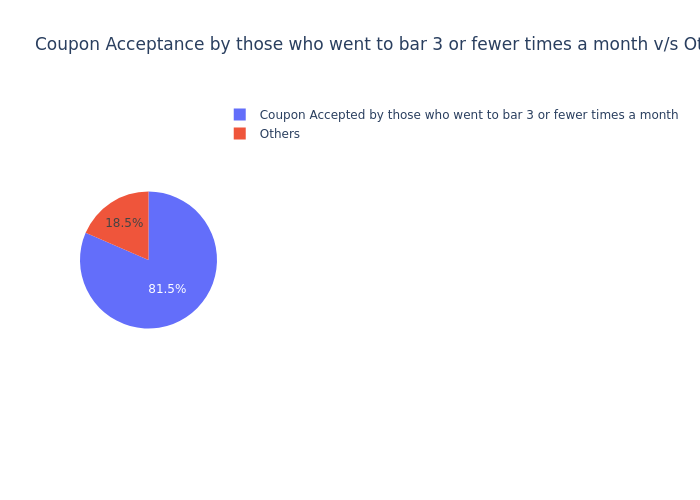

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


#### <span style='color:red'>Answer: Coupon acceptance rate of drivers who go to the bar 1 or more times and are over the age of 25 is almost half compared to the others</span>

In [112]:
#Create a Dataframe for the observations for accepted bar coupons where the drivers went to the bar 1 or more times and were over the age of 25
data_bar_accept_25_above_gteq_1 = data_bar_accept_coupons.query('age >25 and Bar in["1~3","gt8","4~8"]')  
#Calculate the proportion of observations that fit the criteria and Others
data_bar_accept_25_above_gteq_1_prop = pd.DataFrame({'Proportion':[len(data_bar_accept_25_above_gteq_1)/len(data_bar_accept_coupons), (len(data_bar_accept_coupons)-len(data_bar_accept_25_above_gteq_1))/len(data_bar_accept_coupons)],
                                                   'Category':["Coupon Accepted by passengers meeting the criteria","Others"]})
fig = px.pie(data_bar_accept_25_above_gteq_1_prop, values='Proportion',names='Category', title='Coupon Acceptance Distribution of passengers age 25 or above and who go to bar 1 or more than once',
            color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"])
fig.show()

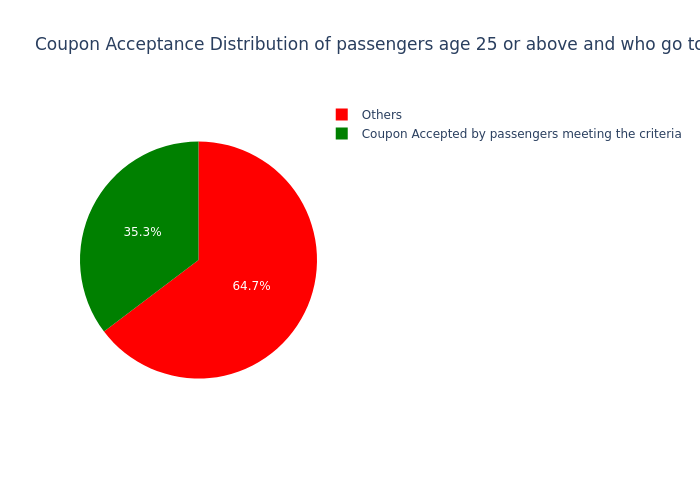

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


#### <span style='color:red'>Answer: Coupon acceptance rate of drivers who go to the bar 1 or more times has passengers that were not a kid and had occupations other than farming, fishing or forestry is almost equal the the Others not matching the criteria</span>

In [113]:
#Create a Dataframe for the given criteria
data_bar_accept_above_gteq_1_nokid_pass_nofarmfishfor = data_bar_accept_coupons.query('passanger !="Kid(s)" and Bar in["1~3","gt8","4~8"] and occupation != "Farming Fishing & Forestry"')  
#Create a Dataframe for the proportion
data_bar_accept_above_gteq_1_nokid_pass_nofarmfishfor_prop = pd.DataFrame({'Proportion':[(len(data_bar_accept_coupons)-len(data_bar_accept_above_gteq_1_nokid_pass_nofarmfishfor))/len(data_bar_accept_coupons), len(data_bar_accept_above_gteq_1_nokid_pass_nofarmfishfor)/len(data_bar_accept_coupons)],
                                                   'Category':["Others","Coupon Accepted by passengers meeting the criteria"]})
fig = px.pie(data_bar_accept_above_gteq_1_nokid_pass_nofarmfishfor_prop, values='Proportion',names='Category', title='Coupon Acceptance by  who go to bars more than once a month and with no kid passangers and had occupations other than farming, fishing, or forestry',
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"])
fig.show()

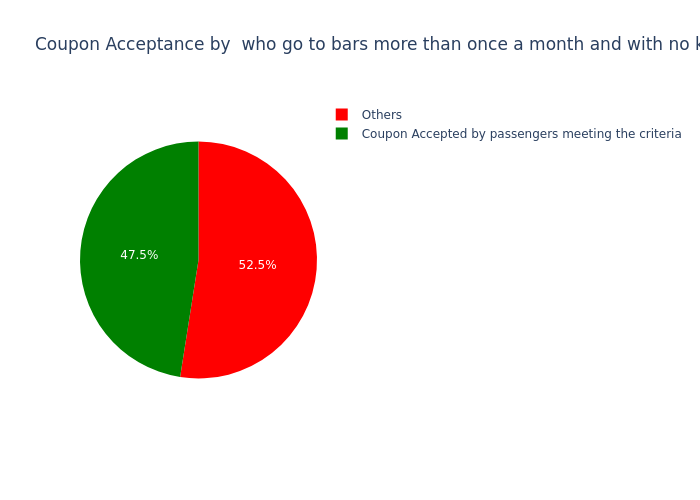

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



#### <span style='color:red'>Answer: Observations meeting the given criteria is more than the ones that don't meet the criteria</span>

In [114]:
#Create an array of "income" to be excluded
exclude_income = ['$25000 - $37499','$12500 - $24999', '$37500 - $49999']
#Create a Dataframe of observations meeting the criteria
data_bar_accept_criteria = data_bar_accept_coupons.query('(passanger !="Kid(s)" and Bar in["1~3","gt8","4~8"] and maritalStatus != "Widowed") or (Bar in["1~3","gt8","4~8"] and age < 30) or (income not in @exclude_income and RestaurantLessThan20 in["4~8","gt8"])') 
#Create a Dataframe of proportion of the observations meeting the criteria and ones that do not
data_bar_accept_criteria_prop = pd.DataFrame({'Proportion':[(len(data_bar_accept_coupons)-len(data_bar_accept_criteria))/len(data_bar_accept_coupons), len(data_bar_accept_criteria)/len(data_bar_accept_coupons)],
                                                   'Category':["Others","Coupon Accepted by passengers meeting the criteria"]})
fig = px.pie(data_bar_accept_criteria_prop, values='Proportion',names='Category', title='Coupon Acceptance Rate for the given criteria v/s Others')
fig.show()

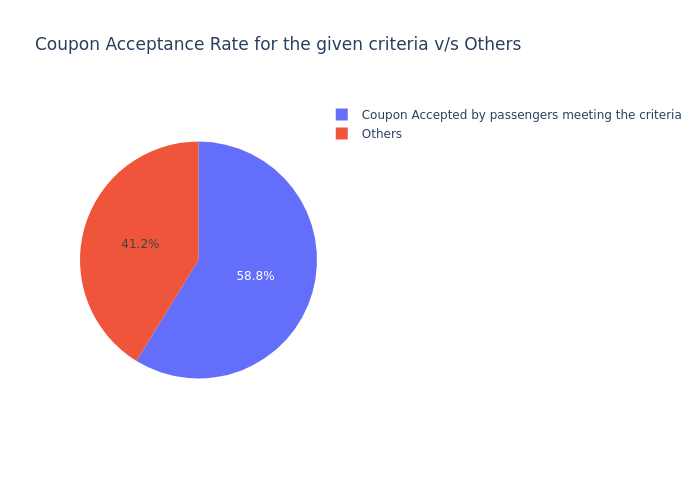

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### <span style='color:red'> Below is the observation and hypothesis of drivers who accepted the bar coupons
- 16% of the accepted coupons amongst all the categories were "Bar" coupons. 
- 41% of the bar coupons were accepted. 
- From explorations 3 and 4 it can be concluded that people below 25 and those who go to bar between 1-3 times a month are most likely to accept the coupons
- From the explorations 5 and 6 conclusive correlation cannot be observed based on the criteria like passengers accompanying, the occupation of the person, marital status or income.</span>

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### 1. Create a new DataFrame that contains just the expensive restaurant coupons.

In [115]:
data_expensive_restaurant_coupons = data[data["coupon"] == 'Restaurant(20-50)']
data_expensive_restaurant_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,distance
14,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,4~8,1~3,1,1,0,0,1,1,2
18,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,4~8,1~3,1,1,0,0,1,1,2
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,4~8,4~8,never,1,1,0,0,1,0,2
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,4~8,4~8,never,1,1,0,0,1,0,2
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,1~3,1~3,never,1,1,0,0,1,0,2


### 2. What proportion of expensive restaurant coupons were accepted?

#### <span style='color:red'>Answer: 44% of the expensive restaurant coupons were accepted</span>

In [116]:
# Craete a Dataframe of accepted coupons grouped by the column Y, get the size of accept and reject and reset index
data_expensive_restaurant_accept= (data_expensive_restaurant_coupons.groupby('Y').size().reset_index())
#Create a column "Proportion" to capture the proportions of accept and reject
data_expensive_restaurant_accept["Proportion"] = data_expensive_restaurant_accept.iloc[:, 1] /len(data_expensive_restaurant_coupons)
data_expensive_restaurant_accept["Y"] = data_expensive_restaurant_accept["Y"].astype(str)
#Create the visualization
fig = px.pie(data_expensive_restaurant_accept, values='Proportion',names='Y', title='Coupon Accept/Reject Distribution',
              color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"])
fig.update_traces(labels=['Rejected Coupons', 'Accepted Coupons'])
fig.show()

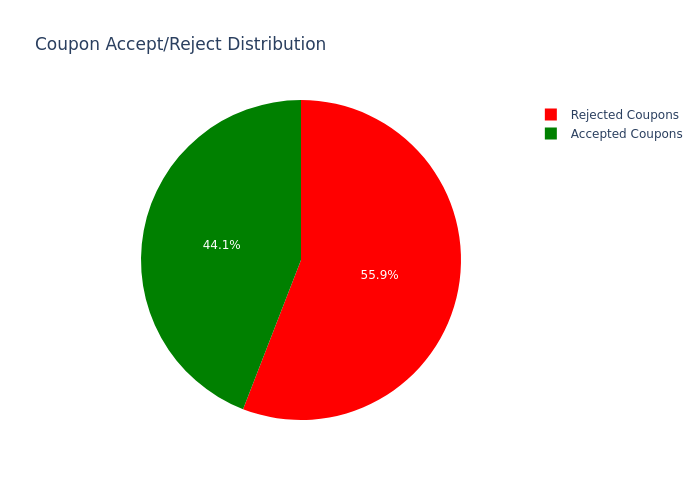

### 3. Does the distance from the restaurant offering the coupon impact the acceptance of the coupons?

#### <span style='color:red'>Answer: Most accepted coupons for expensive restaurants were for places within 25 minutes</span>

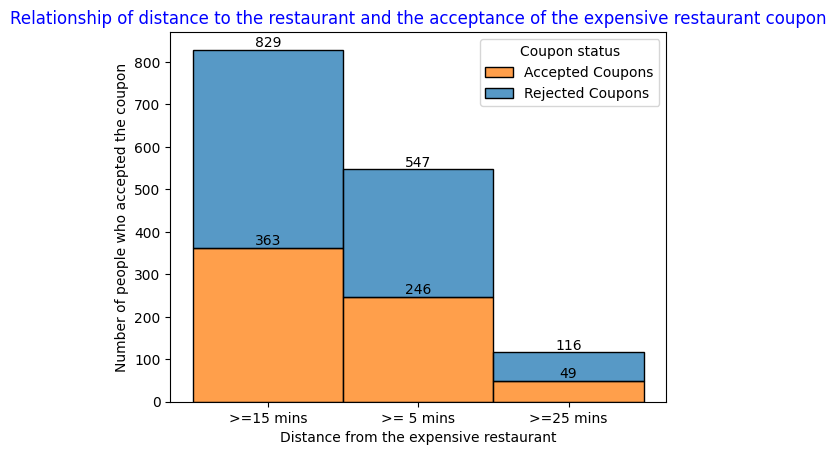

In [117]:
#Create a Dataframe of accepted coupons for the expensive restaurants
data_expensive_restaurant_accept_coupons = data_expensive_restaurant_coupons[data_expensive_restaurant_coupons["Y"]== 1]
#Create the visualization
g=sns.histplot(data=data_expensive_restaurant_coupons, x=data_expensive_restaurant_coupons['distance'].apply(str), hue='Y', multiple="stack")
g.set_xticks(["1", "2", "3"])
g.set_xticklabels(['>= 5 mins', '>=15 mins', '>=25 mins'])
g.set(xlabel="Distance from the expensive restaurant", ylabel="Number of people who accepted the coupon")


plt.title("Relationship of distance to the restaurant and the acceptance of the expensive restaurant coupon", color='blue')
plt.legend(title="Coupon status", labels=["Accepted Coupons", "Rejected Coupons"])
for container in g.containers:
        g.bar_label(container)

plt.show()

### 4.Do Single people(Single, Divorced and Widowed) tend to accept the expensive restaurant coupons over ones with partner

#### <span style='color:red'> Answer: Single/Married or Unmarried with Partner are more likely to accept the expensive restaurant coupons.</span>

In [118]:
#Create a Dataframe with accepted coupons grouped by "maritalStatus"
expensive_restaurant_accept_coupons_count = data_expensive_restaurant_accept_coupons.groupby("maritalStatus")[["Y"]].count().reset_index().set_index("maritalStatus")
#Create a Dataframe with total expensive restaurant coupons grouped by "maritalStatus"
expensive_restaurant_coupons_count = data_expensive_restaurant_coupons.groupby("maritalStatus")[["Y"]].count().reset_index().set_index("maritalStatus")
#Create a new Dataframe with Accepted rate within each "maritalStatus" category
expensive_restaurant_accept_coupons_rate = expensive_restaurant_accept_coupons_count/expensive_restaurant_coupons_count
fig = px.pie(expensive_restaurant_accept_coupons_rate, values='Y',names=expensive_restaurant_accept_coupons_rate.index,  title='Coupon Acceptance Distribution by Marital Status')
fig.show()

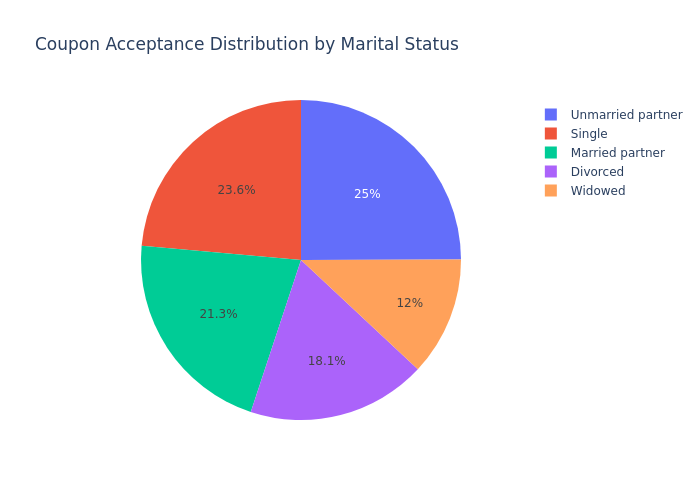

### 5. Compare the rate of acceptance by age. Is there an age group that is more likely to accept the coupon than others?

#### <span style='color:red'> Answer: Looking at the bar plot '#1' below it seems that the people less than the age of 35 are more likely to accept the coupons, however that is because our sample size has more people that are less than the age of 35 bar plot '#2'. If we look at the proportion of people within each group that accepted the coupon- Plot #3, there does not seem to be any stark difference in the acceptance of the coupons across the age groups. It can still be observed that the ages 36 and below are more likely to accept the coupon. 

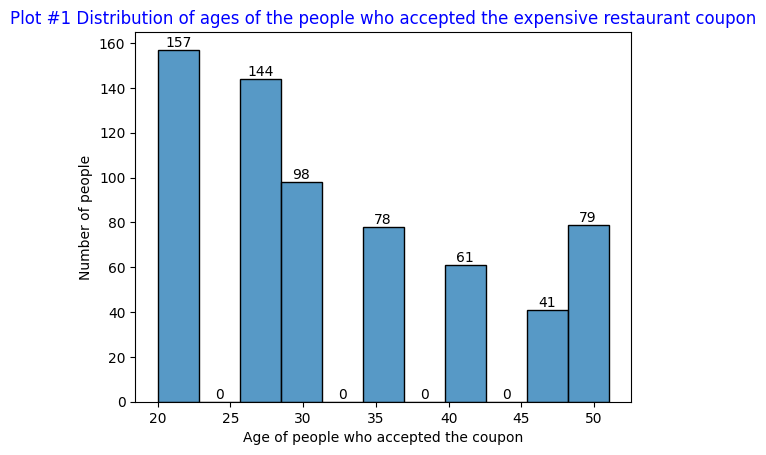

In [119]:
#Create a visualization of the distribution of age of people who accepted the coupon
g=sns.histplot(data=data_expensive_restaurant_accept_coupons, x='age', multiple="stack")
g.set(xlabel="Age of people who accepted the coupon", ylabel="Number of people")
for container in g.containers:
        g.bar_label(container)
plt.title("Plot #1 Distribution of ages of the people who accepted the expensive restaurant coupon", color='blue')
plt.show()

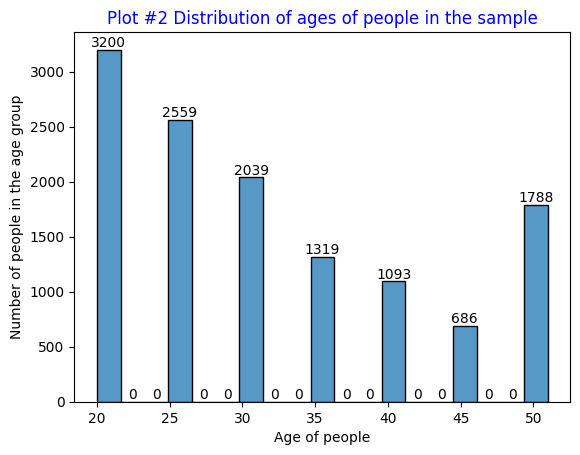

In [120]:
#Create a visualization of the distribution of age of people in the observations
g= sns.histplot(data=data, x='age', multiple="stack")
g.set(xlabel="Age of people", ylabel="Number of people in the age group")
for container in g.containers:
        g.bar_label(container)
plt.title("Plot #2 Distribution of ages of people in the sample", color='blue')
plt.show()

In [121]:
#Create a Dataframe of coupons accepted grouped by age
expensive_restaurant_accept_coupons_age_count = data_expensive_restaurant_accept_coupons.groupby("age")[["Y"]].count().reset_index().set_index("age")
#Create a Dataframe of expensive restaurant coupons offered to people grouped by age.
expensive_restaurant_coupons_age_count = data_expensive_restaurant_coupons.groupby("age")[["Y"]].count().reset_index().set_index("age")
#Create a Dataframe with the acceptance rate by age group
expensive_restaurant_accept_coupons_age_rate = expensive_restaurant_accept_coupons_age_count/expensive_restaurant_coupons_age_count
fig = px.pie(expensive_restaurant_accept_coupons_age_rate, values='Y',names=expensive_restaurant_accept_coupons_age_rate.index,  title='Plot #3 Coupon Acceptance rate by age')
fig.show()

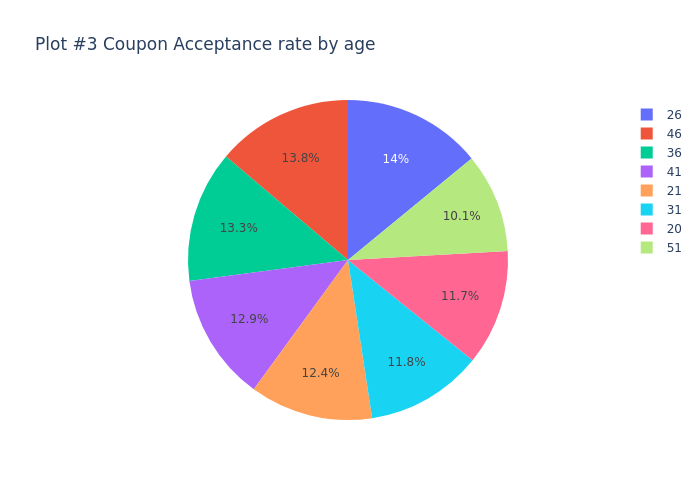

### 6. Compare the acceptance rate of people who went the expensive restaurant 3 or fewer times with those who went more

#### <span style='color:red'>Answer: People who have been to expensive restaurants 3 or fewer times are more likely to accept the coupons.</span>

In [122]:
#Craete a Dataframe of accepted expensive restaurant coupons
data_expensive_restaurant_accept_coupons = data_expensive_restaurant_coupons[data_expensive_restaurant_coupons["Y"]== 1]
#Create a Dataframe of accepted coupons by those who went the expensive restaurants 3 or fewer times
data_expensive_restaurant_accept_lt_3 = data_expensive_restaurant_accept_coupons.query('Restaurant20To50 in["1~3","less1","never"]')  
data_expensive_restaurant_accept_lt_3_prop = pd.DataFrame({'Proportion':[len(data_expensive_restaurant_accept_lt_3)/len(data_expensive_restaurant_accept_coupons), (len(data_expensive_restaurant_accept_coupons)-len(data_expensive_restaurant_accept_lt_3))/len(data_expensive_restaurant_accept_coupons)],
                                                   'Category':["Coupon Accepted by those who went to expensive restaurants 3 or fewer times a month ","Others"]})
fig = px.pie(data_expensive_restaurant_accept_lt_3_prop, values='Proportion',names='Category', title='Coupon Acceptance by those who went to the expensive restaurant 3 or fewer times a month v/s Others')
fig.show()

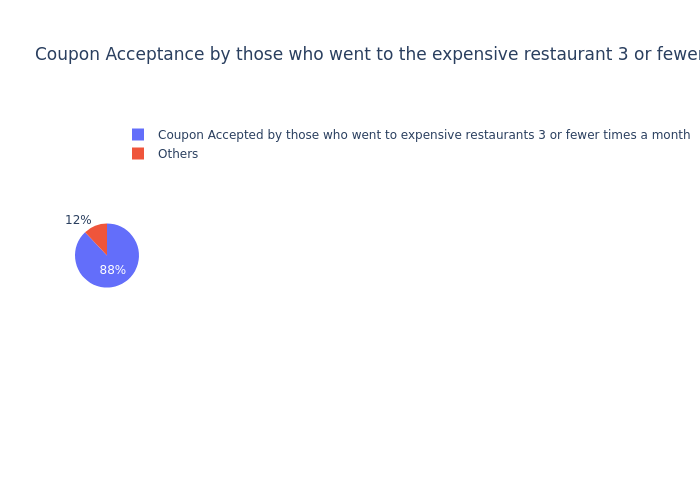

### 7. Does the acceptance rate change based on the income?

#### <span style='color:red'>Answer: There is not much variance in the proportion of the people accepting the coupon within each income category. However the acceptance rate for people with income 25K - 37.5K is slightly higher than the rest.</span>

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '$37500 - $49999'),
  Text(1, 0, '$75000 - $87499'),
  Text(2, 0, '$12500 - $24999'),
  Text(3, 0, '$25000 - $37499'),
  Text(4, 0, '$100000 or More'),
  Text(5, 0, '$87500 - $99999'),
  Text(6, 0, 'Less than $12500'),
  Text(7, 0, '$62500 - $74999'),
  Text(8, 0, '$50000 - $62499')])

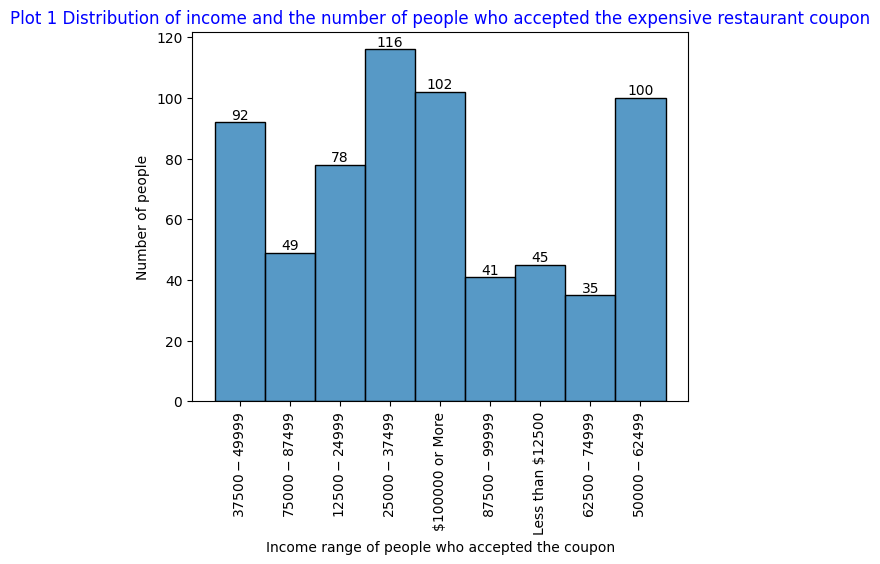

In [123]:
#Visualization of income distribution within the people who accepted the coupon
g=sns.histplot(data=data_expensive_restaurant_accept_coupons, x='income', multiple="stack")
g.set(xlabel="Income range of people who accepted the coupon", ylabel="Number of people")
for container in g.containers:
        g.bar_label(container)
plt.title("Plot 1 Distribution of income and the number of people who accepted the expensive restaurant coupon", color='blue')
plt.xticks(rotation=90)

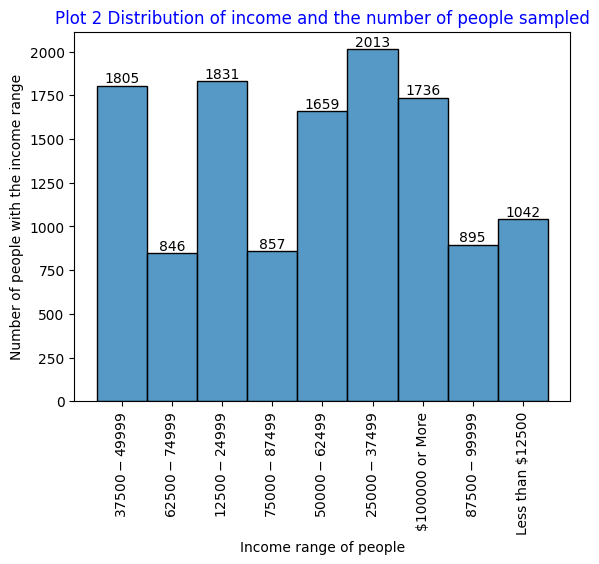

In [124]:
#Visualization of income distribution of people within the observations
g =sns.histplot(data=data, x='income', multiple="stack")

g.set(xlabel="Income range of people", ylabel="Number of people with the income range")
for container in g.containers:
        g.bar_label(container)
plt.title("Plot 2 Distribution of income and the number of people sampled", color='blue')
plt.xticks(rotation=90)
plt.show()

In [125]:
#Create a Dataframe of accepted expensive restaurant coupons grouped by income range
expensive_restaurant_accept_coupons_income_count = data_expensive_restaurant_accept_coupons.groupby("income")[["Y"]].count().reset_index().set_index("income")
#Create a Dataframe of expensive coupons grouped by income range
expensive_restaurant_coupons_income_count = data_expensive_restaurant_coupons.groupby("income")[["Y"]].count().reset_index().set_index("income")
#Create a Dataframe for rate of acceptance of the coupon within each income range
expensive_restaurant_accept_coupons_income_rate = expensive_restaurant_accept_coupons_income_count/expensive_restaurant_coupons_income_count
fig = px.pie(expensive_restaurant_accept_coupons_income_rate, values='Y',names=expensive_restaurant_accept_coupons_income_rate.index,  title='Coupon Acceptance rate by income range')
fig.update_traces(labels=['< 37500', '<62500', '>100000','<87500', '<50000','<25000','<100000','<75000','<125000'])
fig.show()

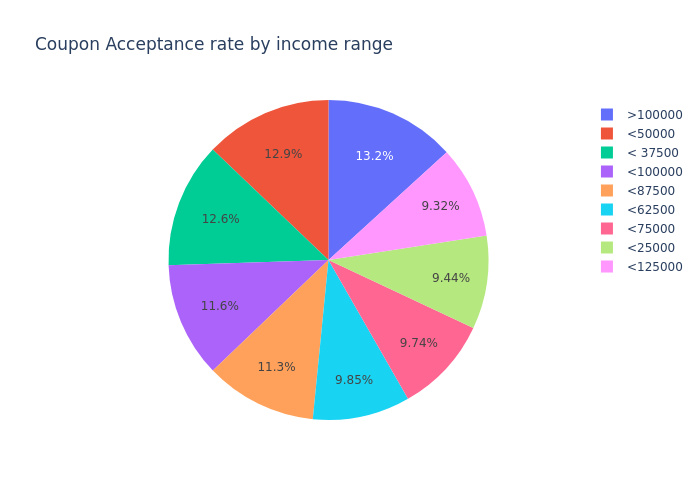

### 8. Does the acceptance rate change based on the time the coupon was sent?

#### <span style='color:red'> Answer: People were more receptive of coupons sent either in the evening around dinner time or early morning</span>

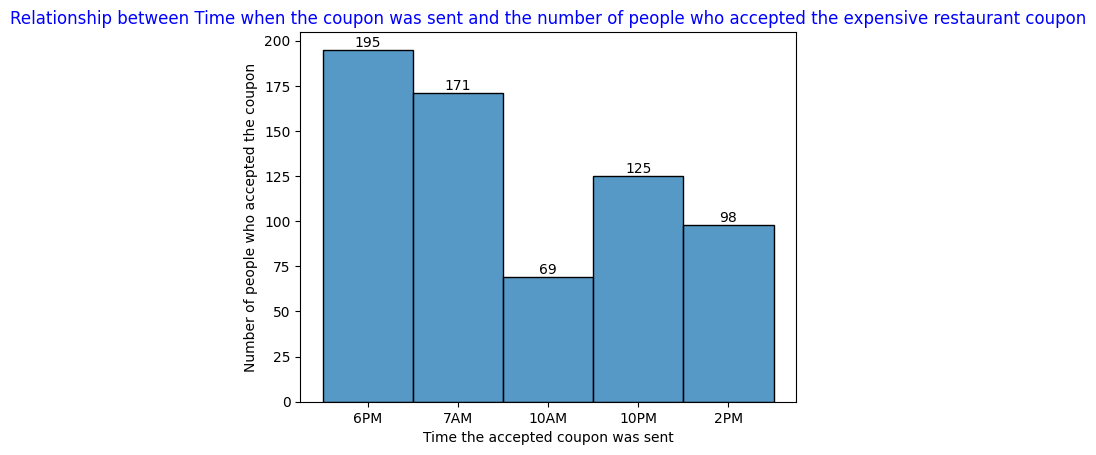

In [126]:
#Visualization of Time the coupon was sent and the acceptance
g = sns.histplot(data=data_expensive_restaurant_accept_coupons, x='time', multiple="stack")
g.set(xlabel="Time the accepted coupon was sent", ylabel="Number of people who accepted the coupon")
for container in g.containers:
        g.bar_label(container)
plt.title("Relationship between Time when the coupon was sent and the number of people who accepted the expensive restaurant coupon", color='blue')
plt.show()

#### <span style='color:red'>Observations summary for expensive restaurant coupons:</span>
- 44% of the expensive gift coupons were accepted
- Most coupons accepted were sent at 6PM, when the restaurants were within 25 minutes distance from the driver's location and by people who have been 3 or fewer times to these restaurants
- Single/Married or Unmarried with partner accepted the coupons
- People under the age of 36 accepted more coupons.
- Income is not much of a factor for the acceptance